In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
primary_data_path = "/content/Online Grocery Shopping Survey.   (Responses).xlsx"
primary_data = pd.read_excel(primary_data_path)


In [ ]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 21 columns):
 #   Column                                                                                                               Non-Null Count  Dtype         
---  ------                                                                                                               --------------  -----         
 0   Timestamp                                                                                                            60 non-null     datetime64[ns]
 1   What is your age group?                                                                                              60 non-null     object        
 2    Where are you located? 
Eg: Berlin,Germany                                                                          60 non-null     object        
 3     What is your employment status?                                                                                    60 non-nul

In [ ]:
primary_data.head(5)

,Timestamp,What is your age group?,"Where are you located? \nEg: Berlin,Germany",What is your employment status?,What is your household size?,How do you primarily shop for groceries?,How often do you buy groceries online?,How much do you typically spend on groceries in a month?,Do you use multiple grocery delivery platforms?,What factors are most important when choosing a grocery delivery service? (Select up to 3),...,What type of groceries do you usually order online?,Do you usually buy branded products or opt for local/organic alternatives ?,How satisfied are you with your current grocery delivery experience?,What challenges have you faced with grocery delivery services?,Would you recommend your current grocery delivery service to others?,What improvements would you like to see in grocery delivery services?,Are you interested in personalized offers or subscription models for groceries?,How do you discover new grocery delivery services?,Would additional features like recipe recommendations or bulk discounts encourage you to use a platform more often?,Any additional comments or suggestions about your online grocery shopping experience?
0,2024-12-17 18:49:42.385,18-24,Berlin,Student,2-3,Both,Occasionaly,Less than 100 €,Yes,"Price/Discount, Delivery Speed, Product Variety",...,"Fresh produce (fruits and vegetables), Dairy a...",Branded products,4,"Delayed Deliveries, High delivery charges",Yes,NaN,Yes,"Social media ads, Recommendations from friends...",Yes,NaN
1,2024-12-20 22:46:25.468,18-24,"Berlin, Germany",Student,4-5,In-store,Monthly,250€-500€,No,"Price/Discount, Product Variety, Freshness/Qua...",...,Snacks and beverages,A mix of both,4,Limited availability of items,No,NaN,Yes,"Social media ads, Online reviews",Yes,NaN
2,2024-12-20 22:46:43.806,25-34,"Berlin, Germany",Student,2-3,In-store,Occasionaly,100€-250€,Yes,"Price/Discount, Product Variety",...,"Pantry items (grains, oils, spices), Frozen food",Branded products,4,Limited availability of items,Yes,NaN,Yes,"Recommendations from friends/family, Online re...",Yes,NaN
3,2024-12-20 22:48:14.748,25-34,Berlin,Student,More than 5,In-store,Occasionaly,100€-250€,Yes,"Price/Discount, Product Variety, Freshness/Qua...",...,"Fresh produce (fruits and vegetables), Dairy a...",A mix of both,4,Limited availability of items,No,NaN,No,"Recommendations from friends/family, Direct pr...",Yes,NaN
4,2024-12-20 22:52:57.520,"35-44, Above 55",COLOGNE,Unemployed,2-3,In-store,Occasionaly,100€-250€,No,"Price/Discount, Delivery Speed, Product Variet...",...,"Pantry items (grains, oils, spices), Snacks an...",A mix of both,4,"Delayed Deliveries, Poor product quality, Limi...",No,NaN,No,"Social media ads, Recommendations from friends...",No,NaN


In [ ]:
print(primary_data.columns)

Index(['Timestamp', 'What is your age group?',
       ' Where are you located? \nEg: Berlin,Germany',
       '  What is your employment status?  ', 'What is your household size?',
       '  How do you primarily shop for groceries?  ',
       '  How often do you buy groceries online?  ',
       'How much do you typically spend on groceries in a month?  ',
       '  Do you use multiple grocery delivery platforms?  ',
       'What factors are most important when choosing a grocery delivery service? (Select up to 3)  ',
       'Do you prefer scheduled deliveries or same-day deliveries?  ',
       'What type of groceries do you usually order online? ',
       '  Do you usually buy branded products or opt for local/organic alternatives ?  ',
       '  How satisfied are you with your current grocery delivery experience?  ',
       '  What challenges have you faced with grocery delivery services? ',
       '  Would you recommend your current grocery delivery service to others?  ',
       '  Wh

In [ ]:
# Clean column names
primary_data.columns = primary_data.columns.str.strip().str.replace(' ', '_', regex=True)

# Print columns for verification
print(primary_data.columns)

# Map the age group
primary_data['What_is_your_age_group?'] = primary_data['What_is_your_age_group?'].map({
    'Under 18': 1,
    '18-24': 2,
    '25-34': 3,
    '35-44': 4,
    '45-55': 5,
    'Above 55': 6
}).fillna(0)  # Replace with a default value if necessary




Index(['Timestamp', 'What_is_your_age_group?',
       'Where_are_you_located?_\nEg:_Berlin,Germany',
       'What_is_your_employment_status?', 'What_is_your_household_size?',
       'How_do_you_primarily_shop_for_groceries?',
       'How_often_do_you_buy_groceries_online?',
       'How_much_do_you_typically_spend_on_groceries_in_a_month?',
       'Do_you_use_multiple_grocery_delivery_platforms?',
       'What_factors_are_most_important_when_choosing_a_grocery_delivery_service?_(Select_up_to_3)',
       'Do_you_prefer_scheduled_deliveries_or_same-day_deliveries?',
       'What_type_of_groceries_do_you_usually_order_online?',
       'Do_you_usually_buy_branded_products_or_opt_for_local/organic_alternatives_?',
       'How_satisfied_are_you_with_your_current_grocery_delivery_experience?',
       'What_challenges_have_you_faced_with_grocery_delivery_services?',
       'Would_you_recommend_your_current_grocery_delivery_service_to_others?',
       'What_improvements_would_you_like_to_see_in_

In [ ]:
primary_data.head(5)

,Timestamp,What_is_your_age_group?,"Where_are_you_located?_\nEg:_Berlin,Germany",What_is_your_employment_status?,What_is_your_household_size?,How_do_you_primarily_shop_for_groceries?,How_often_do_you_buy_groceries_online?,How_much_do_you_typically_spend_on_groceries_in_a_month?,Do_you_use_multiple_grocery_delivery_platforms?,What_factors_are_most_important_when_choosing_a_grocery_delivery_service?_(Select_up_to_3),...,What_type_of_groceries_do_you_usually_order_online?,Do_you_usually_buy_branded_products_or_opt_for_local/organic_alternatives_?,How_satisfied_are_you_with_your_current_grocery_delivery_experience?,What_challenges_have_you_faced_with_grocery_delivery_services?,Would_you_recommend_your_current_grocery_delivery_service_to_others?,What_improvements_would_you_like_to_see_in_grocery_delivery_services?,Are_you_interested_in_personalized_offers_or_subscription_models_for_groceries?,How_do_you_discover_new_grocery_delivery_services?,Would_additional_features_like_recipe_recommendations_or_bulk_discounts_encourage_you_to_use_a_platform_more_often?,Any_additional_comments_or_suggestions_about_your_online_grocery_shopping_experience?
0,2024-12-17 18:49:42.385,2.0,Berlin,Student,2-3,Both,Occasionaly,Less than 100 €,Yes,"Price/Discount, Delivery Speed, Product Variety",...,"Fresh produce (fruits and vegetables), Dairy a...",Branded products,4,"Delayed Deliveries, High delivery charges",Yes,NaN,Yes,"Social media ads, Recommendations from friends...",Yes,NaN
1,2024-12-20 22:46:25.468,2.0,"Berlin, Germany",Student,4-5,In-store,Monthly,250€-500€,No,"Price/Discount, Product Variety, Freshness/Qua...",...,Snacks and beverages,A mix of both,4,Limited availability of items,No,NaN,Yes,"Social media ads, Online reviews",Yes,NaN
2,2024-12-20 22:46:43.806,3.0,"Berlin, Germany",Student,2-3,In-store,Occasionaly,100€-250€,Yes,"Price/Discount, Product Variety",...,"Pantry items (grains, oils, spices), Frozen food",Branded products,4,Limited availability of items,Yes,NaN,Yes,"Recommendations from friends/family, Online re...",Yes,NaN
3,2024-12-20 22:48:14.748,3.0,Berlin,Student,More than 5,In-store,Occasionaly,100€-250€,Yes,"Price/Discount, Product Variety, Freshness/Qua...",...,"Fresh produce (fruits and vegetables), Dairy a...",A mix of both,4,Limited availability of items,No,NaN,No,"Recommendations from friends/family, Direct pr...",Yes,NaN
4,2024-12-20 22:52:57.520,0.0,COLOGNE,Unemployed,2-3,In-store,Occasionaly,100€-250€,No,"Price/Discount, Delivery Speed, Product Variet...",...,"Pantry items (grains, oils, spices), Snacks an...",A mix of both,4,"Delayed Deliveries, Poor product quality, Limi...",No,NaN,No,"Social media ads, Recommendations from friends...",No,NaN


In [ ]:
primary_data['What_is_your_employment_status?'] = primary_data['What_is_your_employment_status?'].map({
    'Student': 1, 'Employed Full-time': 2, 'Self-Employed': 3,
    'Unemployed': 4, 'Retired': 5, 'Employed Part-time': 6
}).fillna(0)


In [ ]:
primary_data['What_is_your_household_size?'] = primary_data['What_is_your_household_size?'].map({
    '1': 1, '2-3': 2, '4-5': 3,
    'More than 5': 4
}).fillna(0)

In [ ]:
primary_data = primary_data.drop(columns=['What_improvements_would_you_like_to_see_in_grocery_delivery_services?', 'Any_additional_comments_or_suggestions_about_your_online_grocery_shopping_experience?'], errors='ignore')

In [ ]:
primary_data.head(5)

,Timestamp,What_is_your_age_group?,"Where_are_you_located?_\nEg:_Berlin,Germany",What_is_your_employment_status?,What_is_your_household_size?,How_do_you_primarily_shop_for_groceries?,How_often_do_you_buy_groceries_online?,How_much_do_you_typically_spend_on_groceries_in_a_month?,Do_you_use_multiple_grocery_delivery_platforms?,What_factors_are_most_important_when_choosing_a_grocery_delivery_service?_(Select_up_to_3),Do_you_prefer_scheduled_deliveries_or_same-day_deliveries?,What_type_of_groceries_do_you_usually_order_online?,Do_you_usually_buy_branded_products_or_opt_for_local/organic_alternatives_?,How_satisfied_are_you_with_your_current_grocery_delivery_experience?,What_challenges_have_you_faced_with_grocery_delivery_services?,Would_you_recommend_your_current_grocery_delivery_service_to_others?,Are_you_interested_in_personalized_offers_or_subscription_models_for_groceries?,How_do_you_discover_new_grocery_delivery_services?,Would_additional_features_like_recipe_recommendations_or_bulk_discounts_encourage_you_to_use_a_platform_more_often?
0,2024-12-17 18:49:42.385,2.0,Berlin,1,2.0,Both,Occasionaly,Less than 100 €,Yes,"Price/Discount, Delivery Speed, Product Variety",Same-day Deliveries,"Fresh produce (fruits and vegetables), Dairy a...",Branded products,4,"Delayed Deliveries, High delivery charges",Yes,Yes,"Social media ads, Recommendations from friends...",Yes
1,2024-12-20 22:46:25.468,2.0,"Berlin, Germany",1,3.0,In-store,Monthly,250€-500€,No,"Price/Discount, Product Variety, Freshness/Qua...",Scheduled Deliveries,Snacks and beverages,A mix of both,4,Limited availability of items,No,Yes,"Social media ads, Online reviews",Yes
2,2024-12-20 22:46:43.806,3.0,"Berlin, Germany",1,2.0,In-store,Occasionaly,100€-250€,Yes,"Price/Discount, Product Variety",Same-day Deliveries,"Pantry items (grains, oils, spices), Frozen food",Branded products,4,Limited availability of items,Yes,Yes,"Recommendations from friends/family, Online re...",Yes
3,2024-12-20 22:48:14.748,3.0,Berlin,1,4.0,In-store,Occasionaly,100€-250€,Yes,"Price/Discount, Product Variety, Freshness/Qua...",Same-day Deliveries,"Fresh produce (fruits and vegetables), Dairy a...",A mix of both,4,Limited availability of items,No,No,"Recommendations from friends/family, Direct pr...",Yes
4,2024-12-20 22:52:57.520,0.0,COLOGNE,4,2.0,In-store,Occasionaly,100€-250€,No,"Price/Discount, Delivery Speed, Product Variet...",Same-day Deliveries,"Pantry items (grains, oils, spices), Snacks an...",A mix of both,4,"Delayed Deliveries, Poor product quality, Limi...",No,No,"Social media ads, Recommendations from friends...",No


In [ ]:
primary_data['How_do_you_primarily_shop_for_groceries?'] = (
    primary_data['How_do_you_primarily_shop_for_groceries?']
    .str.strip()  # Remove any extra whitespace
    .map({'In-store': 1, 'Online delivery services': 2, 'Both': 3})
    .fillna(0)  # Replace NaN values with 0 if needed
)


In [ ]:
primary_data.head(5)

,Timestamp,What_is_your_age_group?,"Where_are_you_located?_\nEg:_Berlin,Germany",What_is_your_employment_status?,What_is_your_household_size?,How_do_you_primarily_shop_for_groceries?,How_often_do_you_buy_groceries_online?,How_much_do_you_typically_spend_on_groceries_in_a_month?,Do_you_use_multiple_grocery_delivery_platforms?,What_factors_are_most_important_when_choosing_a_grocery_delivery_service?_(Select_up_to_3),Do_you_prefer_scheduled_deliveries_or_same-day_deliveries?,What_type_of_groceries_do_you_usually_order_online?,Do_you_usually_buy_branded_products_or_opt_for_local/organic_alternatives_?,How_satisfied_are_you_with_your_current_grocery_delivery_experience?,What_challenges_have_you_faced_with_grocery_delivery_services?,Would_you_recommend_your_current_grocery_delivery_service_to_others?,Are_you_interested_in_personalized_offers_or_subscription_models_for_groceries?,How_do_you_discover_new_grocery_delivery_services?,Would_additional_features_like_recipe_recommendations_or_bulk_discounts_encourage_you_to_use_a_platform_more_often?
0,2024-12-17 18:49:42.385,2.0,Berlin,1,2.0,3,Occasionaly,Less than 100 €,Yes,"Price/Discount, Delivery Speed, Product Variety",Same-day Deliveries,"Fresh produce (fruits and vegetables), Dairy a...",Branded products,4,"Delayed Deliveries, High delivery charges",Yes,Yes,"Social media ads, Recommendations from friends...",Yes
1,2024-12-20 22:46:25.468,2.0,"Berlin, Germany",1,3.0,1,Monthly,250€-500€,No,"Price/Discount, Product Variety, Freshness/Qua...",Scheduled Deliveries,Snacks and beverages,A mix of both,4,Limited availability of items,No,Yes,"Social media ads, Online reviews",Yes
2,2024-12-20 22:46:43.806,3.0,"Berlin, Germany",1,2.0,1,Occasionaly,100€-250€,Yes,"Price/Discount, Product Variety",Same-day Deliveries,"Pantry items (grains, oils, spices), Frozen food",Branded products,4,Limited availability of items,Yes,Yes,"Recommendations from friends/family, Online re...",Yes
3,2024-12-20 22:48:14.748,3.0,Berlin,1,4.0,1,Occasionaly,100€-250€,Yes,"Price/Discount, Product Variety, Freshness/Qua...",Same-day Deliveries,"Fresh produce (fruits and vegetables), Dairy a...",A mix of both,4,Limited availability of items,No,No,"Recommendations from friends/family, Direct pr...",Yes
4,2024-12-20 22:52:57.520,0.0,COLOGNE,4,2.0,1,Occasionaly,100€-250€,No,"Price/Discount, Delivery Speed, Product Variet...",Same-day Deliveries,"Pantry items (grains, oils, spices), Snacks an...",A mix of both,4,"Delayed Deliveries, Poor product quality, Limi...",No,No,"Social media ads, Recommendations from friends...",No


In [ ]:
primary_data['How_often_do_you_buy_groceries_online?'] = (
    primary_data['How_often_do_you_buy_groceries_online?']
    .str.strip()  # Remove any extra whitespace
    .map({
        'More than once a week': 1,
        'Weekly': 2,
        'Bi-weekly': 3,
        'Monthly': 4,
        'Occasionaly': 5
    })
    .fillna(0)  # Replace NaN values with 0
)

In [ ]:
primary_data['How_much_do_you_typically_spend_on_groceries_in_a_month?'] = (
    primary_data['How_much_do_you_typically_spend_on_groceries_in_a_month?']
    .str.strip()  # Remove any extra whitespace
    .map({
        'Less than 100 €': 1,
        '100€-250€': 2,
        '250€-500€': 3,
        'More than 500€': 4
    })
    .fillna(0)  # Replace NaN values with 0
)


In [ ]:
primary_data['Do_you_use_multiple_grocery_delivery_platforms?'] = (
    primary_data['Do_you_use_multiple_grocery_delivery_platforms?']
    .str.strip()  # Remove extra whitespace
    .map({'Yes': 1, 'No': 0})  # Map Yes to 1, No to 0
    .fillna(0)  # Replace NaN values with 0
)


In [ ]:
# Split and map the values
primary_data['Factors_for_grocery_delivery'] = (
    primary_data['What_factors_are_most_important_when_choosing_a_grocery_delivery_service?_(Select_up_to_3)']
    .str.split(',')  # Split multiple values into a list
    .apply(lambda x: [  # Map each factor
        {'Price/Discount': 0, 'Delivery Speed': 1, 'Product Variety': 2,
         'Freshness/Quality': 3, 'Customer Service': 4, 'Ease of app/Website use': 5}.get(i.strip(), -1) for i in x
    ] if isinstance(x, list) else [-1])  # Handle missing values
)


In [ ]:
# Split and map the values
primary_data['Groceries_usually_ordered_online'] = (
    primary_data['What_type_of_groceries_do_you_usually_order_online?']
    .str.split(',')  # Split multiple values into a list
    .apply(lambda x: [  # Map each type of grocery
        {
            'Fresh produce (fruits and vegetables)': 0,
            'Dairy and eggs': 1,
            'Meat and seafood': 2,
            'Pantry items (grains, oils, spices)': 3,
            'Snacks and beverages': 4,
            'Frozen food': 5
        }.get(i.strip(), -1) for i in x
    ] if isinstance(x, list) else [-1])  # Handle missing or invalid values
)


In [ ]:
# Ensure columns are standardized
primary_data.columns = primary_data.columns.str.strip().str.replace(' ', '_')

# Ensure columns are standardized
primary_data.columns = primary_data.columns.str.strip().str.replace(' ', '_')

# Access the column using the updated name
primary_data['Do_you_usually_buy_branded_products_or_opt_for_local/organic_alternatives_?'] = (
    primary_data['Do_you_usually_buy_branded_products_or_opt_for_local/organic_alternatives_?']
    .str.strip()  # Remove any extra whitespace
    .map({
        'Branded products': 0,
        'Local/organic alternatives': 1,
        'A mix of both': 2
    })
    .fillna(0)  # Replace NaN values with 0
)

In [ ]:
# Split and map the values
primary_data['Challenges_with_grocery_delivery_services'] = (
    primary_data['What_challenges_have_you_faced_with_grocery_delivery_services?']
    .str.split(',')  # Split multiple selected values into a list
    .apply(lambda x: [  # Map each challenge to its corresponding number
        {
            'Delayed Deliveries': 0,
            'Poor product quality': 1,
            'Limited availability of items': 2,
            'High delivery charges': 3,
            'Difficult app/website interface': 4
        }.get(i.strip(), -1) for i in x  # Handle missing values gracefully
    ] if isinstance(x, list) else [-1])  # For missing or invalid rows
)


In [ ]:
# Access the column using the standardized name with underscores
primary_data['Would_you_recommend_your_current_grocery_delivery_service_to_others?'] = primary_data['Would_you_recommend_your_current_grocery_delivery_service_to_others?'].map({
    'Yes': 1, 'No': 0
})

In [ ]:
# Access the column using the standardized name with underscores
primary_data['Are_you_interested_in_personalized_offers_or_subscription_models_for_groceries?'] = primary_data['Are_you_interested_in_personalized_offers_or_subscription_models_for_groceries?'].map({
    'Yes': 1,
    'No': 0
}).fillna(0)


In [ ]:
# Ensure columns are standardized for all columns
primary_data.columns = primary_data.columns.str.strip().str.replace(' ', '_', regex=True)

# Access the column using the standardized name with underscores
primary_data['Would_additional_features_like_recipe_recommendations_or_bulk_discounts_encourage_you_to_use_a_platform_more_often?'] = primary_data['Would_additional_features_like_recipe_recommendations_or_bulk_discounts_encourage_you_to_use_a_platform_more_often?'].map({
    'Yes': 1,
    'No': 0
}).fillna(0)


In [ ]:
primary_data.head(5)

,Timestamp,What_is_your_age_group?,"Where_are_you_located?_\nEg:_Berlin,Germany",What_is_your_employment_status?,What_is_your_household_size?,How_do_you_primarily_shop_for_groceries?,How_often_do_you_buy_groceries_online?,How_much_do_you_typically_spend_on_groceries_in_a_month?,Do_you_use_multiple_grocery_delivery_platforms?,What_factors_are_most_important_when_choosing_a_grocery_delivery_service?_(Select_up_to_3),...,Do_you_usually_buy_branded_products_or_opt_for_local/organic_alternatives_?,How_satisfied_are_you_with_your_current_grocery_delivery_experience?,What_challenges_have_you_faced_with_grocery_delivery_services?,Would_you_recommend_your_current_grocery_delivery_service_to_others?,Are_you_interested_in_personalized_offers_or_subscription_models_for_groceries?,How_do_you_discover_new_grocery_delivery_services?,Would_additional_features_like_recipe_recommendations_or_bulk_discounts_encourage_you_to_use_a_platform_more_often?,Factors_for_grocery_delivery,Groceries_usually_ordered_online,Challenges_with_grocery_delivery_services
0,2024-12-17 18:49:42.385,2.0,Berlin,1,2.0,3,5,1,1,"Price/Discount, Delivery Speed, Product Variety",...,0,4,"Delayed Deliveries, High delivery charges",1,1.0,"Social media ads, Recommendations from friends...",1.0,"[0, 1, 2]","[0, 1, 4, 5]","[0, 3]"
1,2024-12-20 22:46:25.468,2.0,"Berlin, Germany",1,3.0,1,4,3,0,"Price/Discount, Product Variety, Freshness/Qua...",...,2,4,Limited availability of items,0,1.0,"Social media ads, Online reviews",1.0,"[0, 2, 3, 5]",[4],[2]
2,2024-12-20 22:46:43.806,3.0,"Berlin, Germany",1,2.0,1,5,2,1,"Price/Discount, Product Variety",...,0,4,Limited availability of items,1,1.0,"Recommendations from friends/family, Online re...",1.0,"[0, 2]","[-1, -1, -1, 5]",[2]
3,2024-12-20 22:48:14.748,3.0,Berlin,1,4.0,1,5,2,1,"Price/Discount, Product Variety, Freshness/Qua...",...,2,4,Limited availability of items,0,0.0,"Recommendations from friends/family, Direct pr...",1.0,"[0, 2, 3, 5]","[0, 1, 2, 4, 5]",[2]
4,2024-12-20 22:52:57.520,0.0,COLOGNE,4,2.0,1,5,2,0,"Price/Discount, Delivery Speed, Product Variet...",...,2,4,"Delayed Deliveries, Poor product quality, Limi...",0,0.0,"Social media ads, Recommendations from friends...",0.0,"[0, 1, 2, 3]","[-1, -1, -1, 4]","[0, 1, 2, 3]"


In [ ]:
primary_data.drop(columns=['Where_are_you_located?_\nEg:_Berlin,Germany', 'What_factors_are_most_important_when_choosing_a_grocery_delivery_service?_(Select_up_to_3)','Do_you_prefer_scheduled_deliveries_or_same-day_deliveries?','How_do_you_discover_new_grocery_delivery_services?',], inplace=True)

In [ ]:
# Rename columns for simplicity
primary_data.rename(columns={
    'Timestamp': 'Date',
    'What_is_your_age_group?': 'Age_Group',
    'What_is_your_employment_status?': 'Employment_Status',
    'What_is_your_household_size?': 'Household_Size',
    'How_do_you_primarily_shop_for_groceries?': 'Shopping_Method',
    'How_often_do_you_buy_groceries_online?': 'Online_Shopping_Frequency',
    'How_much_do_you_typically_spend_on_groceries_in_a_month?': 'Monthly_Spend',
    'Do_you_use_multiple_grocery_delivery_platforms?': 'Multiple_Platforms',
    'What_type_of_groceries_do_you_usually_order_online?': 'Grocery_Types',
    'Do_you_usually_buy_branded_products_or_opt_for_local/organic_alternatives_?': 'Product_Preference',
    'How_satisfied_are_you_with_your_current_grocery_delivery_experience?': 'Satisfaction',
    'What_challenges_have_you_faced_with_grocery_delivery_services?': 'Challenges',
    'Would_you_recommend_your_current_grocery_delivery_service_to_others?': 'Recommend_Service',
    'Are_you_interested_in_personalized_offers_or_subscription_models_for_groceries?': 'Personalized_Offers',
    'Would_additional_features_like_recipe_recommendations_or_bulk_discounts_encourage_you_to_use_a_platform_more_often?': 'Feature_Encouragement',
}, inplace=True)

In [ ]:
primary_data.head(5)

,Date,Age_Group,Employment_Status,Household_Size,Shopping_Method,Online_Shopping_Frequency,Monthly_Spend,Multiple_Platforms,Grocery_Types,Product_Preference,Satisfaction,Challenges,Recommend_Service,Personalized_Offers,Feature_Encouragement,Factors_for_grocery_delivery,Groceries_usually_ordered_online,Challenges_with_grocery_delivery_services
0,2024-12-17 18:49:42.385,2.0,1,2.0,3,5,1,1,"Fresh produce (fruits and vegetables), Dairy a...",0,4,"Delayed Deliveries, High delivery charges",1,1.0,1.0,"[0, 1, 2]","[0, 1, 4, 5]","[0, 3]"
1,2024-12-20 22:46:25.468,2.0,1,3.0,1,4,3,0,Snacks and beverages,2,4,Limited availability of items,0,1.0,1.0,"[0, 2, 3, 5]",[4],[2]
2,2024-12-20 22:46:43.806,3.0,1,2.0,1,5,2,1,"Pantry items (grains, oils, spices), Frozen food",0,4,Limited availability of items,1,1.0,1.0,"[0, 2]","[-1, -1, -1, 5]",[2]
3,2024-12-20 22:48:14.748,3.0,1,4.0,1,5,2,1,"Fresh produce (fruits and vegetables), Dairy a...",2,4,Limited availability of items,0,0.0,1.0,"[0, 2, 3, 5]","[0, 1, 2, 4, 5]",[2]
4,2024-12-20 22:52:57.520,0.0,4,2.0,1,5,2,0,"Pantry items (grains, oils, spices), Snacks an...",2,4,"Delayed Deliveries, Poor product quality, Limi...",0,0.0,0.0,"[0, 1, 2, 3]","[-1, -1, -1, 4]","[0, 1, 2, 3]"


In [ ]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Date                                       60 non-null     datetime64[ns]
 1   Age_Group                                  60 non-null     float64       
 2   Employment_Status                          60 non-null     int64         
 3   Household_Size                             60 non-null     float64       
 4   Shopping_Method                            60 non-null     int64         
 5   Online_Shopping_Frequency                  60 non-null     int64         
 6   Monthly_Spend                              60 non-null     int64         
 7   Multiple_Platforms                         60 non-null     int64         
 8   Grocery_Types                              60 non-null     object        
 9   Product_Preference     

In [ ]:
primary_data.isna().sum()

,0
Date,0
Age_Group,0
Employment_Status,0
Household_Size,0
Shopping_Method,0
Online_Shopping_Frequency,0
Monthly_Spend,0
Multiple_Platforms,0
Grocery_Types,0
Product_Preference,0


In [ ]:
primary_data.isnull().sum()

,0
Date,0
Age_Group,0
Employment_Status,0
Household_Size,0
Shopping_Method,0
Online_Shopping_Frequency,0
Monthly_Spend,0
Multiple_Platforms,0
Grocery_Types,0
Product_Preference,0


In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.1 MB/s eta 0:00:00


In [ ]:
from faker import Faker # Import the Faker class
import numpy as np # Import numpy for random seed

In [ ]:
# Step 2: Generate Synthetic Data
np.random.seed(42)

In [ ]:
# Step 3: Generate Synthetic Data
fake = Faker()
synthetic_data = []
for _ in range(1000 - len(primary_data)):
    synthetic_data.append({
        "Age_Group": fake.random_element(elements=("18-24", "25-34", "35-44", "45-55", "Above 55")),
        "Monthly_Spend": fake.random_element(elements=("<100", "100-250", "250-500", ">500")),
        "Online_Shop_Frequency": fake.random_element(elements=("Weekly", "Bi-weekly", "Occasionally", "Monthly")),
        "Date": fake.date_between(start_date="-1y", end_date="today")
    })
synthetic_df = pd.DataFrame(synthetic_data)

In [ ]:
synthetic_df.head(5)

,Age_Group,Monthly_Spend,Online_Shop_Frequency,Date
0,35-44,100-250,Bi-weekly,2025-01-08
1,18-24,<100,Occasionally,2024-04-02
2,25-34,250-500,Monthly,2024-10-25
3,45-55,100-250,Bi-weekly,2024-02-17
4,Above 55,<100,Bi-weekly,2024-02-27


In [ ]:
synthetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age_Group              940 non-null    object
 1   Monthly_Spend          940 non-null    object
 2   Online_Shop_Frequency  940 non-null    object
 3   Date                   940 non-null    object
dtypes: object(4)
memory usage: 29.5+ KB


In [ ]:
synthetic_df.isna().sum()

,0
Age_Group,0
Monthly_Spend,0
Online_Shop_Frequency,0
Date,0


In [ ]:
synthetic_df.isnull().sum()

,0
Age_Group,0
Monthly_Spend,0
Online_Shop_Frequency,0
Date,0


In [ ]:
synthetic_df.head(5)

,Age_Group,Monthly_Spend,Online_Shop_Frequency,Date
0,35-44,100-250,Bi-weekly,2025-01-08
1,18-24,<100,Occasionally,2024-04-02
2,25-34,250-500,Monthly,2024-10-25
3,45-55,100-250,Bi-weekly,2024-02-17
4,Above 55,<100,Bi-weekly,2024-02-27


In [ ]:
synthetic_df.isna().sum()

,0
Age_Group,0
Monthly_Spend,0
Online_Shop_Frequency,0
Date,0


In [ ]:
synthetic_df.isnull().sum()

,0
Age_Group,0
Monthly_Spend,0
Online_Shop_Frequency,0
Date,0


In [ ]:
# Combine original and synthetic data
combined_data = pd.concat([primary_data, synthetic_df], ignore_index=True)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       1000 non-null   object 
 1   Age_Group                                  1000 non-null   object 
 2   Employment_Status                          60 non-null     float64
 3   Household_Size                             60 non-null     float64
 4   Shopping_Method                            60 non-null     float64
 5   Online_Shopping_Frequency                  60 non-null     float64
 6   Monthly_Spend                              1000 non-null   object 
 7   Multiple_Platforms                         60 non-null     float64
 8   Grocery_Types                              60 non-null     object 
 9   Product_Preference                         60 non-null     float64
 10  Satisfaction             

In [ ]:
# Clean column names
combined_data.columns = combined_data.columns.str.strip().str.replace(' ', '_', regex=True)

# Print columns for verification
print(combined_data.columns)

# Map the age group
combined_data['Age_Group'] = combined_data['Age_Group'].map({
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-55': 4,
    'Above 55': 5
}).fillna(0)  # Replace with a default value if necessary

Index(['Date', 'Age_Group', 'Employment_Status', 'Household_Size',
       'Shopping_Method', 'Online_Shopping_Frequency', 'Monthly_Spend',
       'Multiple_Platforms', 'Grocery_Types', 'Product_Preference',
       'Satisfaction', 'Challenges', 'Recommend_Service',
       'Personalized_Offers', 'Feature_Encouragement',
       'Factors_for_grocery_delivery', 'Groceries_usually_ordered_online',
       'Challenges_with_grocery_delivery_services', 'Online_Shop_Frequency'],
      dtype='object')


In [ ]:
combined_data['Monthly_Spend'] = (
    combined_data['Monthly_Spend']
    .str.strip()  # Remove any extra whitespace
    .map({
        '<100': 1,
        '100-250': 2,
        '250-500': 3,
        '>500': 4,

    })
    .fillna(0)  # Replace NaN values with 0
)

In [ ]:
combined_data['Online_Shop_Frequency'] = (
    combined_data['Online_Shop_Frequency']
    .str.strip()  # Remove any extra whitespace
    .map({
        'Weekly': 1,
        'Bi-weekly': 2,
        'Occasionally': 3,
        'Monthly': 4,

    })
    .fillna(0)  # Replace NaN values with 0
)

In [ ]:
combined_data.head(5)

,Date,Age_Group,Employment_Status,Household_Size,Shopping_Method,Online_Shopping_Frequency,Monthly_Spend,Multiple_Platforms,Grocery_Types,Product_Preference,Satisfaction,Challenges,Recommend_Service,Personalized_Offers,Feature_Encouragement,Factors_for_grocery_delivery,Groceries_usually_ordered_online,Challenges_with_grocery_delivery_services,Online_Shop_Frequency
0,2024-12-17 18:49:42.385000,0.0,1.0,2.0,3.0,5.0,0.0,1.0,"Fresh produce (fruits and vegetables), Dairy a...",0.0,4.0,"Delayed Deliveries, High delivery charges",1.0,1.0,1.0,"[0, 1, 2]","[0, 1, 4, 5]","[0, 3]",0.0
1,2024-12-20 22:46:25.468000,0.0,1.0,3.0,1.0,4.0,0.0,0.0,Snacks and beverages,2.0,4.0,Limited availability of items,0.0,1.0,1.0,"[0, 2, 3, 5]",[4],[2],0.0
2,2024-12-20 22:46:43.806000,0.0,1.0,2.0,1.0,5.0,0.0,1.0,"Pantry items (grains, oils, spices), Frozen food",0.0,4.0,Limited availability of items,1.0,1.0,1.0,"[0, 2]","[-1, -1, -1, 5]",[2],0.0
3,2024-12-20 22:48:14.748000,0.0,1.0,4.0,1.0,5.0,0.0,1.0,"Fresh produce (fruits and vegetables), Dairy a...",2.0,4.0,Limited availability of items,0.0,0.0,1.0,"[0, 2, 3, 5]","[0, 1, 2, 4, 5]",[2],0.0
4,2024-12-20 22:52:57.520000,0.0,4.0,2.0,1.0,5.0,0.0,0.0,"Pantry items (grains, oils, spices), Snacks an...",2.0,4.0,"Delayed Deliveries, Poor product quality, Limi...",0.0,0.0,0.0,"[0, 1, 2, 3]","[-1, -1, -1, 4]","[0, 1, 2, 3]",0.0


In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       1000 non-null   object 
 1   Age_Group                                  1000 non-null   float64
 2   Employment_Status                          60 non-null     float64
 3   Household_Size                             60 non-null     float64
 4   Shopping_Method                            60 non-null     float64
 5   Online_Shopping_Frequency                  60 non-null     float64
 6   Monthly_Spend                              1000 non-null   float64
 7   Multiple_Platforms                         60 non-null     float64
 8   Grocery_Types                              60 non-null     object 
 9   Product_Preference                         60 non-null     float64
 10  Satisfaction             

In [ ]:
combined_data['Online_Shop_Frequency']

,Online_Shop_Frequency
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,2.0
996,1.0
997,4.0
998,1.0


In [ ]:
combined_data['Monthly_Spend']

,Monthly_Spend
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,4.0
996,2.0
997,4.0
998,1.0


In [ ]:
combined_data['Age_Group']

,Age_Group
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,3.0
996,5.0
997,5.0
998,4.0


In [ ]:
combined_data.isna().sum()

,0
Date,0
Age_Group,0
Employment_Status,940
Household_Size,940
Shopping_Method,940
Online_Shopping_Frequency,940
Monthly_Spend,0
Multiple_Platforms,940
Grocery_Types,940
Product_Preference,940


In [ ]:
combined_data.isnull().sum()

,0
Date,0
Age_Group,0
Employment_Status,940
Household_Size,940
Shopping_Method,940
Online_Shopping_Frequency,940
Monthly_Spend,0
Multiple_Platforms,940
Grocery_Types,940
Product_Preference,940


In [ ]:
combined_data.head(5)

,Date,Age_Group,Employment_Status,Household_Size,Shopping_Method,Online_Shopping_Frequency,Monthly_Spend,Multiple_Platforms,Grocery_Types,Product_Preference,Satisfaction,Challenges,Recommend_Service,Personalized_Offers,Feature_Encouragement,Factors_for_grocery_delivery,Groceries_usually_ordered_online,Challenges_with_grocery_delivery_services,Online_Shop_Frequency
0,2024-12-17 18:49:42.385000,0.0,1.0,2.0,3.0,5.0,0.0,1.0,"Fresh produce (fruits and vegetables), Dairy a...",0.0,4.0,"Delayed Deliveries, High delivery charges",1.0,1.0,1.0,"[0, 1, 2]","[0, 1, 4, 5]","[0, 3]",0.0
1,2024-12-20 22:46:25.468000,0.0,1.0,3.0,1.0,4.0,0.0,0.0,Snacks and beverages,2.0,4.0,Limited availability of items,0.0,1.0,1.0,"[0, 2, 3, 5]",[4],[2],0.0
2,2024-12-20 22:46:43.806000,0.0,1.0,2.0,1.0,5.0,0.0,1.0,"Pantry items (grains, oils, spices), Frozen food",0.0,4.0,Limited availability of items,1.0,1.0,1.0,"[0, 2]","[-1, -1, -1, 5]",[2],0.0
3,2024-12-20 22:48:14.748000,0.0,1.0,4.0,1.0,5.0,0.0,1.0,"Fresh produce (fruits and vegetables), Dairy a...",2.0,4.0,Limited availability of items,0.0,0.0,1.0,"[0, 2, 3, 5]","[0, 1, 2, 4, 5]",[2],0.0
4,2024-12-20 22:52:57.520000,0.0,4.0,2.0,1.0,5.0,0.0,0.0,"Pantry items (grains, oils, spices), Snacks an...",2.0,4.0,"Delayed Deliveries, Poor product quality, Limi...",0.0,0.0,0.0,"[0, 1, 2, 3]","[-1, -1, -1, 4]","[0, 1, 2, 3]",0.0


In [ ]:
combined_data.head(5)

,Date,Age_Group,Employment_Status,Household_Size,Shopping_Method,Online_Shopping_Frequency,Monthly_Spend,Multiple_Platforms,Grocery_Types,Product_Preference,Satisfaction,Challenges,Recommend_Service,Personalized_Offers,Feature_Encouragement,Factors_for_grocery_delivery,Groceries_usually_ordered_online,Challenges_with_grocery_delivery_services,Online_Shop_Frequency
0,2024-12-17 18:49:42.385000,0.0,1.0,2.0,3.0,5.0,0.0,1.0,"Fresh produce (fruits and vegetables), Dairy a...",0.0,4.0,"Delayed Deliveries, High delivery charges",1.0,1.0,1.0,"[0, 1, 2]","[0, 1, 4, 5]","[0, 3]",0.0
1,2024-12-20 22:46:25.468000,0.0,1.0,3.0,1.0,4.0,0.0,0.0,Snacks and beverages,2.0,4.0,Limited availability of items,0.0,1.0,1.0,"[0, 2, 3, 5]",[4],[2],0.0
2,2024-12-20 22:46:43.806000,0.0,1.0,2.0,1.0,5.0,0.0,1.0,"Pantry items (grains, oils, spices), Frozen food",0.0,4.0,Limited availability of items,1.0,1.0,1.0,"[0, 2]","[-1, -1, -1, 5]",[2],0.0
3,2024-12-20 22:48:14.748000,0.0,1.0,4.0,1.0,5.0,0.0,1.0,"Fresh produce (fruits and vegetables), Dairy a...",2.0,4.0,Limited availability of items,0.0,0.0,1.0,"[0, 2, 3, 5]","[0, 1, 2, 4, 5]",[2],0.0
4,2024-12-20 22:52:57.520000,0.0,4.0,2.0,1.0,5.0,0.0,0.0,"Pantry items (grains, oils, spices), Snacks an...",2.0,4.0,"Delayed Deliveries, Poor product quality, Limi...",0.0,0.0,0.0,"[0, 1, 2, 3]","[-1, -1, -1, 4]","[0, 1, 2, 3]",0.0


In [ ]:
# Step 5: Customer Segmentation using K-Means
scaler = StandardScaler()
features = combined_data[["Monthly_Spend", "Online_Shop_Frequency"]]
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
combined_data['Customer_Segment'] = kmeans.fit_predict(features_scaled)

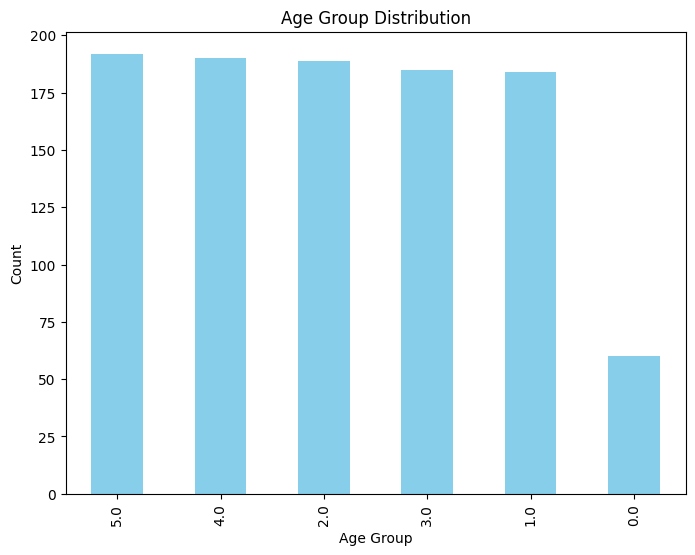

In [ ]:
# Step 6: Data Analysis
# Age group distribution
age_group_counts = combined_data['Age_Group'].value_counts()
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

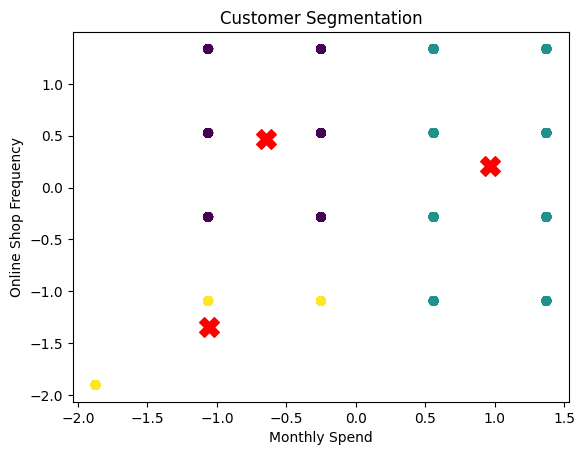

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=combined_data['Customer_Segment'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Plot cluster centers
plt.title('Customer Segmentation')
plt.xlabel('Monthly Spend')
plt.ylabel('Online Shop Frequency')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

# Silhouette Score
silhouette = silhouette_score(features_scaled, combined_data['Customer_Segment'])
print(f"Silhouette Score: {silhouette}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(features_scaled, combined_data['Customer_Segment'])
print(f"Davies-Bouldin Index: {davies_bouldin}")

Inertia: 764.4995676858471
Silhouette Score: 0.4156563470191864
Davies-Bouldin Index: 0.935882527110845
